In [1]:
import kornia as K
from kornia.io import ImageLoadType
import torch
import matplotlib.pyplot as plt

/home/edgar/.local/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
img = K.io.load_image(
    "/home/edgar/data/farm_ng/2023_12_04_20_20_43_050915_boron-banana.out/left/input/image_000000.jpg",
    ImageLoadType.GRAY32
)
print(img.shape)
print(img.dtype)

torch.Size([1, 400, 640])
torch.float32


Text(0.5, 1.0, 'Distorted Image')

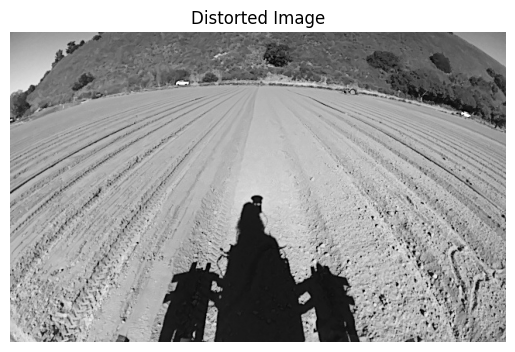

In [3]:
plt.imshow(img.squeeze().numpy(), cmap='gray')
plt.axis('off')
plt.title('Distorted Image')

In [4]:
params = torch.tensor([
      283.686,  # fx
      283.686,  # fy
      321.575,  # cx
      196.912,  # cy
     0.776859,  # k1
    0.0202133,  # k2
  0.000267291,  # k3
  -0.00014369,  # k4
  -0.00459558,  # k5
      1.11585,  # k6  
     0.182433,  # k7
   -0.0144412,  # k8
])
print(params.shape)

torch.Size([12])


In [5]:
# create a base grid for points sampling
grid_base = K.utils.create_meshgrid(
    width=img.shape[-1],
    height=img.shape[-2],
    normalized_coordinates=False)
print(grid_base.shape)
print(grid_base.min())
print(grid_base.max())

torch.Size([1, 400, 640, 2])
tensor(0.)
tensor(639.)


In [6]:
grid_affine = K.geometry.camera.distort_points_kannala_brandt(
    grid_base, params[..., :8].view(1, 1, 1, 8))
print(grid_affine.shape)

torch.Size([1, 400, 640, 2])


Text(0.5, 1.0, 'Distorted Grid Y')

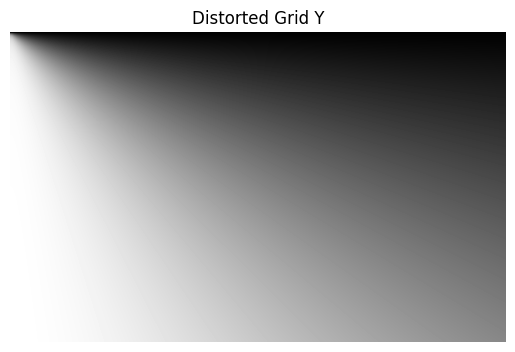

In [11]:
plt.imshow(grid_affine[0, ..., 0].numpy(), cmap='gray')
plt.axis('off')
plt.title('Distorted Grid (x)')

In [ ]:
 Grid X')

plt.imshow(grid_affine[0, ..., 1].numpy(), cmap='gray')
plt.axis('off')
plt.title('Distorted Grid Y')

In [9]:
# sample the image (or batch of images)
img_undistorted = K.geometry.remap(
    img[None, ...],
    grid_affine[..., 0],
    grid_affine[..., 1],
    normalized_coordinates=False,
    align_corners=True)
print(img_undistorted.shape)
print(img_undistorted.min(), img_undistorted.max())

torch.Size([1, 1, 400, 640])
tensor(0.) tensor(0.8116)


Text(0.5, 1.0, 'Undistorted Image')

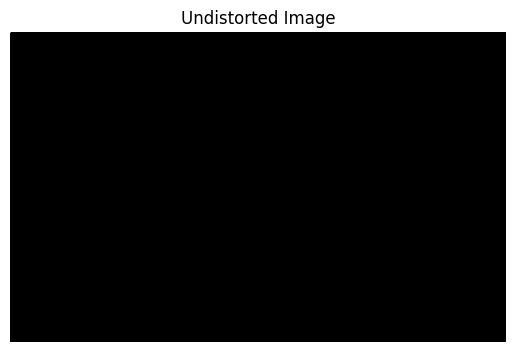

In [8]:
# show the undistorted image
plt.imshow(img_undistorted.squeeze().numpy(), cmap='gray')
plt.axis('off')
plt.title('Undistorted Image')